### Loading the Required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "/home/chaitanya/computer_vision/images/"

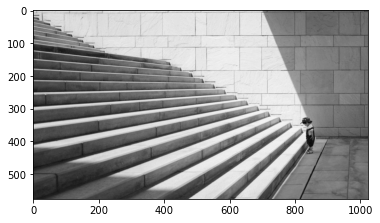

In [3]:
stairs_image_path = path + "stairs.jpg"
stairs_image = cv2.imread(stairs_image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(stairs_image, cmap="gray")
plt.show()

##### Applying Edge detector using Canny

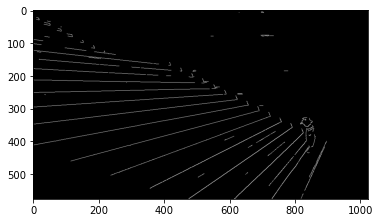

In [4]:
stairs_canny_edges = cv2.Canny(stairs_image, 400, 500)
plt.figure(figsize=(6, 6))
plt.imshow(stairs_canny_edges, cmap="gray")
plt.show()

##### Performing Hough Transform

In [5]:
lines = cv2.HoughLines(stairs_canny_edges, 1, np.pi / 180, threshold=100)

In [6]:
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(stairs_image, (x1, y1), (x2, y2), (0, 0, 255), 2) 

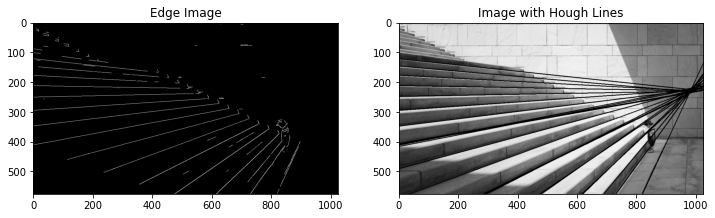

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(stairs_canny_edges, cmap="gray")
plt.title("Edge Image")
plt.subplot(1, 2, 2)
plt.imshow(stairs_image, cmap="gray")
plt.title("Image with Hough Lines")
plt.show()

##### Detecting Circles with Hough Transformation

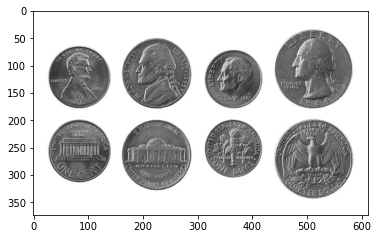

In [8]:
coins_image_path = path + "coins.jpg"
coins_image = cv2.imread(coins_image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6, 6))
plt.imshow(coins_image, cmap="gray")
plt.show()

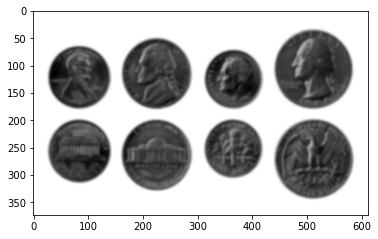

In [9]:
blurred_image = cv2.GaussianBlur(coins_image, (9, 9), 2)
plt.figure(figsize=(6, 6))
plt.imshow(blurred_image, cmap="gray")
plt.show()

##### Use HoughCircles to detect circles

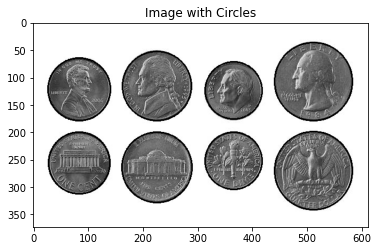

In [10]:
circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=1,  # Inverse ratio of the accumulator resolution to the image resolution.
    minDist=100,  # Minimum distance between detected centers.
    param1=100,  # Upper threshold for the internal Canny edge detector.
    param2=30,   # Threshold for center detection.
    minRadius=10,  # Minimum radius to be detected.
    maxRadius=200  # Maximum radius to be detected.
)

# Convert the circles to integers (if any were found)
if circles is not None:
    circles = np.uint16(np.around(circles))

    # Draw the circles on the original image
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]
        cv2.circle(coins_image, center, radius, (0, 255, 0), 2)

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(coins_image, cv2.COLOR_BGR2RGB))
    plt.title('Image with Circles')
    plt.show()
else:
    print("No circles detected.")